In [12]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model, Sequential

from keras.datasets import mnist
from keras.callbacks import Callback
import numpy as np
import wandb
from wandb.keras import WandbCallback

run = wandb.init()
config = run.config

config.encoding_dim = 32
config.epochs = 10

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [8]:

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(config.encoding_dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(28*28, activation='sigmoid'))
model.add(Reshape((28,28)))
model.compile(optimizer='adam', loss='mse')

# For visualization
class Images(Callback):
      def on_epoch_end(self, epoch, logs):
            indices = np.random.randint(self.validation_data[0].shape[0], size=8)
            test_data = self.validation_data[0][indices]
            pred_data = self.model.predict(test_data)
            run.history.row.update({
                  "examples": [
                        wandb.Image(np.hstack([data, pred_data[i]]), caption=str(i))
                        for i, data in enumerate(test_data)]
            })

model.fit(x_train, x_train,
                epochs=config.epochs,
                validation_data=(x_test, x_test), 
          callbacks=[Images(), WandbCallback()])


model.save('auto.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0265 - val_loss: 0.0145
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0133 - val_loss: 0.0119
Epoch 3/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0115 - val_loss: 0.0107
Epoch 4/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0106 - val_loss: 0.0099
Epoch 5/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0100 - val_loss: 0.0095
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0095 - val_loss: 0.0092
Epoch 7/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0092 - val_loss: 0.0088
Epoch 8/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0089 - val_loss: 0.0086
Epoch 9/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0087 - val_loss: 0.

Using CNN


In [55]:
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, UpSampling2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.callbacks import Callback

import numpy as np
import wandb
from wandb.keras import WandbCallback

run = wandb.init()
config = run.config

config.epochs = 100

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

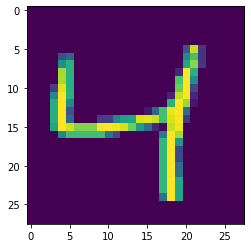

In [56]:
import matplotlib.pyplot as plt
img = x_train[2]
plt.imshow(img)
plt.show()

In [45]:
model = Sequential()
model.add(Reshape((28,28,1), input_shape=(28,28)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(.3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(.3))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))
model.add(Reshape((28,28)))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_14 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 28, 28, 32)      

In [25]:
class Images(Callback):
      def on_epoch_end(self, epoch, logs):
            indices = np.random.randint(self.validation_data[0].shape[0], size=8)
            test_data = self.validation_data[0][indices]
            pred_data = self.model.predict(test_data)
            run.history.row.update({
                  "examples": [
                        wandb.Image(np.hstack([data, pred_data[i]]), caption=str(i))
                        for i, data in enumerate(test_data)]
            })

model.fit(x_train, x_train,
                epochs=3,
                validation_data=(x_test, x_test), 
                callbacks=[WandbCallback()])


model.save('auto-cnn.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
   96/60000 [..............................] - ETA: 7:01 - loss: 0.0038

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.428495). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.215043). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 162s 3ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 2/3
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/3
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0020 - val_loss: 0.0013


In [59]:
test_data = x_test[0]
test_data.shape
# pred_data = np.clip(model.predict(test_data), 0, 1)

(28, 28)

Fashion MNIST

In [2]:
!pip install tensorflow-gpu
!pip install wandb

     |████████████████████████████████| 1.3MB 47.6MB/s 
     |████████████████████████████████| 102kB 14.5MB/s 
     |████████████████████████████████| 460kB 62.5MB/s 
     |████████████████████████████████| 92kB 15.6MB/s 
     |████████████████████████████████| 92kB 13.5MB/s 
     |████████████████████████████████| 256kB 57.6MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 
     |████████████████████████████████| 184kB 42.2MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=841857cb4b2171fd4b63c21f2f59f429737e5efcea8eb553b61950e03cee07aa
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for watchdog: filename=watchdog-0.9.0-cp36-none-any.whl size=73652 sha256=5650d25b581de44e2827d173b45c69ad8ed45f24387eae6a418a4673251a29d3
  Stored in directory: /root/.cache/pip/wheels/61/1d/d0/04cfe495619be2095eb8d89a31c42adb4e42b76495bc8f784c
  Created wheel for gql:

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape, Dropout, UpSampling2D
from tensorflow.keras.callbacks import LambdaCallback
import numpy as np
import wandb
from wandb.keras import WandbCallback


# logging code
run = wandb.init(project="denoising-autoencoder")
config = run.config
config.encoding_dim = 32

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
def add_noise(x_train, x_test):
    # Function to add some random noise
    noise_factor = 1.0
    x_train_noisy = x_train + np.random.normal(loc=0.0, scale=noise_factor, size=x_train.shape) 
    x_test_noisy = x_test + np.random.normal(loc=0.0, scale=noise_factor, size=x_test.shape) 
    
    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)
    return x_train_noisy, x_test_noisy

def log_images(epoch, logs):
    # Function to show the before and after images at each step
    indices = np.random.randint(x_test_noisy.shape[0], size=8)
    test_data = x_test_noisy[indices]
    pred_data = np.clip(model.predict(test_data), 0, 1)
    wandb.log({
            "examples": [
                wandb.Image(np.hstack([data, pred_data[i]]), caption=str(i))
                for i, data in enumerate(test_data)]
        }, commit=False)

(x_train, _), (x_test, _) = fashion_mnist.load_data()
(x_train_noisy, x_test_noisy) = add_noise(x_train, x_test)
img_width = x_train.shape[1]
img_height = x_train.shape[2]

x_train = x_train / 255.
x_test = x_test / 255.


4423680/4422102 [==============================] - 0s 0us/step


In [10]:
# create model
# model = Sequential()
# model.add(Flatten(input_shape=(img_width, img_height)))
# model.add(Dense(config.encoding_dim, activation="relu"))
# model.add(Dense(img_width*img_height, activation="sigmoid"))
# model.add(Reshape((img_width, img_height)))
# model.compile(loss='mse', optimizer='adam',
#               metrics=['mse'])
# model.summary()


model = Sequential()
model.add(Reshape((img_width,img_width,1), input_shape=(img_width,img_width)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(.3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(.3))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
model.add(Reshape((28,28)))

model.compile(optimizer='adam', loss='mse',metrics=['mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 32)       

In [11]:
# Fit the model
model.fit(x_train_noisy, x_train, epochs=10, validation_data=(x_test_noisy, x_test),
          callbacks=[WandbCallback(), LambdaCallback(on_epoch_end=log_images)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 4/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 7/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0288 - mse: 0.0288 - val_